# Data Importing

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from  matplotlib.pyplot import plot
import statsmodels as sm
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

In [8]:
# importing benchmark interest rate dataset 
Bch_int = pd.read_excel("/Users/BENEL ENERGY/Documents/Benchmark interest rates.xlsx",index_col='Date', parse_dates=True)
Gld = pd.read_csv("/Users/BENEL ENERGY/Downloads/GLD.csv", index_col='Date', parse_dates=True)
Vxus = pd.read_csv("/Users/BENEL ENERGY/Downloads/VXUS.csv", index_col='Date', parse_dates=True)

# Data Processing

In [9]:
# calculate returns
r_Gld = Gld["Adj Close"].pct_change()
r_Vxus = Vxus["Adj Close"].pct_change()
print(r_Gld.head())

Date
2019-10-01         NaN
2019-10-02    0.011674
2019-10-03    0.004531
2019-10-04    0.000000
2019-10-07   -0.008527
Name: Adj Close, dtype: float64


# Data Summary 

### Averages 

In [10]:
# average price for the month of october (GOLD)
P_Gld = Gld[["Adj Close"]]
avr_oct_Gld = P_Gld[P_Gld.index< '2019-11-01'].mean()
print("The average price of Gold for the month of October:", avr_oct_Gld)

The average price of Gold for the month of October: Adj Close    140.874782
dtype: float64


In [11]:
# average price for the month of november (GOLD)
P_Gld = Gld[["Adj Close"]]
avr_nov_Gld = P_Gld[P_Gld.index>'2019-10-31'].mean()
print("The average price of Gold for the month of november:", avr_nov_Gld)

The average price of Gold for the month of november: Adj Close    138.5705
dtype: float64


In [12]:
# average price for the month of october (VXUS)
P_Vxus = Vxus[["Adj Close"]]
avr_oct_Vxus = P_Vxus[P_Vxus.index<'2019-11-01'].mean()
print("The average price of VXUS for the month of October:", avr_oct_Vxus)

The average price of VXUS for the month of October: Adj Close    49.596141
dtype: float64


In [13]:
# average price for the month of november (VXUS)
P_Vxus = Vxus[["Adj Close"]]
avr_nov_Vxus = P_Vxus[P_Vxus.index> '2019-10-31'].mean()
print("The average price of VXUS for the month of november:", avr_nov_Vxus)

The average price of VXUS for the month of november: Adj Close    51.441688
dtype: float64


### Standard Deviation 

In [14]:
# Standard Deviation of the price for the month of october 2019 (GOLD)
P_Gld = Gld[["Adj Close"]]
std_oct_Gld = P_Gld[P_Gld.index<'2019-11-01'].std()
print("The Standard Deviation of the price of Gold for the month of October:", std_oct_Gld)

The Standard Deviation of the price of Gold for the month of October: Adj Close    0.831229
dtype: float64


In [15]:
# Standard Deviation of the price for the month of november 2019 (GOLD)
P_Gld = Gld[["Adj Close"]]
std_nov_Gld = P_Gld[P_Gld.index>'2019-10-31'].std()
print("The Standard Deviation of the price of Gold for the month of november:", std_nov_Gld)

The Standard Deviation of the price of Gold for the month of november: Adj Close    1.562095
dtype: float64


In [16]:
# Standard Deviation of the price for the month of october 2019 (VXUS)
P_Vxus = Vxus[["Adj Close"]]
std_oct_Vxus = P_Vxus[P_Vxus.index< '2019-11-01'].std()
print("The Standard Deviation of the price of VXUS for the month of October:", std_oct_Vxus)

The Standard Deviation of the price of VXUS for the month of October: Adj Close    1.019105
dtype: float64


In [17]:
# Standard Deviation of the price for the month of november 2019 (VXUS)
P_Vxus = Vxus[["Adj Close"]]
std_nov_Vxus = P_Vxus[P_Vxus.index> '2019-10-31'].std()
print("The Standard Deviation of the price of VXUS for the month of november:", std_nov_Vxus)

The Standard Deviation of the price of VXUS for the month of november: Adj Close    0.197157
dtype: float64


# No. 4:  Graphs

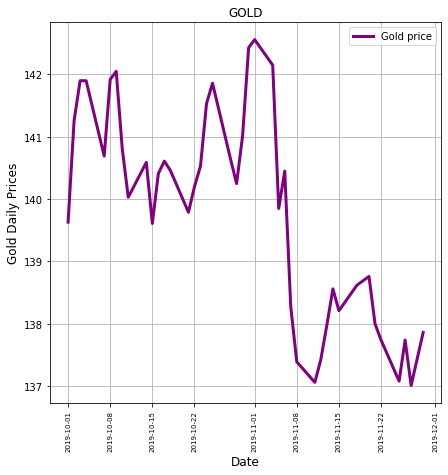

In [18]:
#Graph for Gold 
G1 = Gld["Adj Close"]

plt.figure(figsize = (7, 7))
plt.plot(G1, label = "Gold price", color = "purple", linewidth = 3)
plt.ylabel("Gold Daily Prices", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.title('GOLD', fontsize = 12)

plt.grid()
plt.legend()

plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 10)

plt.show()

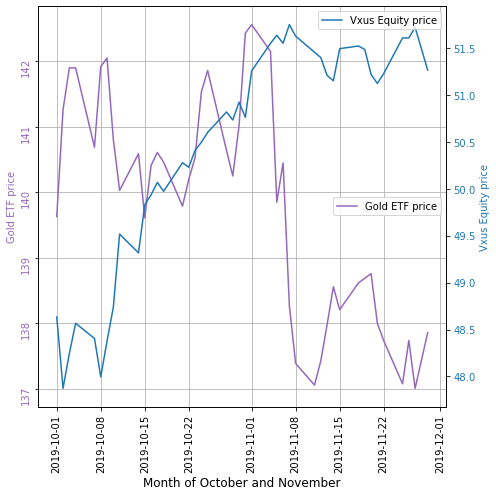

In [19]:
v1 = Vxus["Adj Close"]


# Plotting the equity and gold prices in the same graph 
fig, ax1 = plt.subplots(figsize = (7, 7))

color = 'tab:purple'
ax1.set_xlabel('Month of October and November', fontsize = 12)
ax1.set_ylabel('Gold ETF price', color = color)
ax1.plot(G1, label = 'Gold ETF price',  color = color)
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.tick_params(rotation = 90)
ax1.legend(loc = 5)

ax2 = ax1.twinx()  #  instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Vxus Equity price', color=color)  # we already handled the x-label with ax1
ax2.plot(v1, label = 'Vxus Equity price',  color=color)
ax2.tick_params(axis='y',  labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

ax2.legend(loc = 'upper right')

plt.show()



In [20]:
G1['2019-10-02']

141.259995

# MODEL VOLATILITY

In [21]:
#for October
High = Gld['High'].values
Low = Gld['Low'].values
octDiff_high_low = High[0:23] - Low[0:23]
#print('The daily high and low', octDiff_high_low)
print('The average of high minus low for october is',octDiff_high_low.mean())

#for November
NovDiff_high_low = High[23:43] - Low[23:43]
#print('The daily high and low', NovDiff_high_low)
print('The average of high minus low for November is',NovDiff_high_low.mean())


The average of high minus low for october is 1.081305478260873
The average of high minus low for November is 0.9724975999999999


In [22]:
#7b
#Standard devition of the Gold returns
Gold_returns_oct = r_Gld[1:23].values
Gold_returns_nov = r_Gld[23:43].values
print('The standard deviation of gold return for October is ', Gold_returns_oct.std())
print('The standard deviation of gold return for November is ', Gold_returns_nov.std())

The standard deviation of gold return for October is  0.006031447911960158
The standard deviation of gold return for November is  0.006031254751468618


In [23]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
# 7c GARCH(1,1) MODEL: Fit the data to Garch(1,1)
#for October
Fit_Gold_returns = arch_model(r_Gld[1:23], p=1, q=1)
print(Fit_Gold_returns.fit())
model_fit = Fit_Gold_returns.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8053105.645113464
Iteration:      2,   Func. Count:     17,   Neg. LLF: 26106645016.751698
Iteration:      3,   Func. Count:     27,   Neg. LLF: 812721.9481198491
Iteration:      4,   Func. Count:     37,   Neg. LLF: -81.2576610723361
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.25766110464703
            Iterations: 8
            Function evaluations: 37
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                81.2577
Distribution:                  Normal   AIC:                          -154.515
Method:            Maximum Likelihood   BIC:                          -150.151
                             

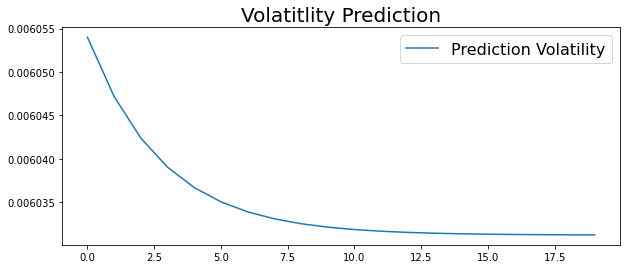

In [28]:
#prediction of violatility using model 

predictions = model_fit.forecast(horizon = 20)
plt.figure(figsize = (10, 4))
#true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatitlity Prediction', fontsize = 20)
plt.legend(['Prediction Volatility'], fontsize = 16)


In [29]:
# 7d GARCH(1,1) MODEL: Fit the data to Garch(1,1)
#for November
Fit_Gold_returns_nov = arch_model(r_Gld[23:43], p=1, q=1)
print(Fit_Gold_returns_nov.fit())
model_fit = Fit_Gold_returns_nov.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12684817.542295108
Iteration:      2,   Func. Count:     16,   Neg. LLF: -73.97790009442136
Optimization terminated successfully    (Exit mode 0)
            Current function value: -73.9779001217992
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                73.9779
Distribution:                  Normal   AIC:                          -139.956
Method:            Maximum Likelihood   BIC:                          -135.973
                                        No. Observations:                   20
Date:                Wed, Dec 01 2021   Df Residuals:                       16
Time:          

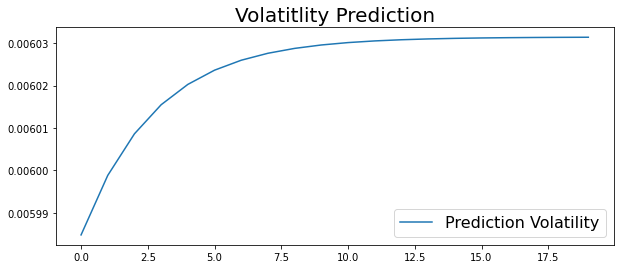

In [30]:
#prediction of violatility using model 

predictions = model_fit.forecast(horizon = 20)
plt.figure(figsize = (10, 4))
#true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatitlity Prediction', fontsize = 20)
plt.legend(['Prediction Volatility'], fontsize = 16)


In [131]:
#7e
#Equity (VXUS)
#High minus low
#for October
EHigh = Vxus['High'].values
ELow = Vxus['Low'].values
EoctDiff_high_low = EHigh[0:23] - ELow[0:23]
#print('The daily high and low', octDiff_high_low)
print('The average of high minus low for october is',EoctDiff_high_low.mean())

#for November
ENovDiff_high_low = EHigh[23:43] - ELow[23:43]
#print('The daily high and low', NovDiff_high_low)
print('The average of high minus low for october is',ENovDiff_high_low.mean())

The average of high minus low for october is 0.3169562173913045
The average of high minus low for october is 0.2290003000000002


In [132]:
#7f
#Standard devition of the Gold returns
Equity_returns_oct = r_Vxus[1:23].values
Equity_returns_nov = r_Vxus[23:43].values
print('The standard deviation of gold return for October is ', Equity_returns_oct.std())
print('The standard deviation of gold return for October is ', Equity_returns_nov.std())

The standard deviation of gold return for October is  0.00661541571551893
The standard deviation of gold return for October is  0.004435499227869192


In [31]:
# 7g GARCH(1,1) MODEL: Fit the data to Garch(1,1)
#for October (Equity)
Fit_Equity_returns = arch_model(r_Vxus[1:23], p=1, q=1)
print(Fit_Equity_returns.fit())
model_fit = Fit_Equity_returns.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2272940534216328.5
Iteration:      2,   Func. Count:     16,   Neg. LLF: -81.27750019908743
Optimization terminated successfully    (Exit mode 0)
            Current function value: -81.277500415484
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                81.2775
Distribution:                  Normal   AIC:                          -154.555
Method:            Maximum Likelihood   BIC:                          -150.191
                                        No. Observations:                   22
Date:                Wed, Dec 01 2021   Df Residuals:                       18
Time:           

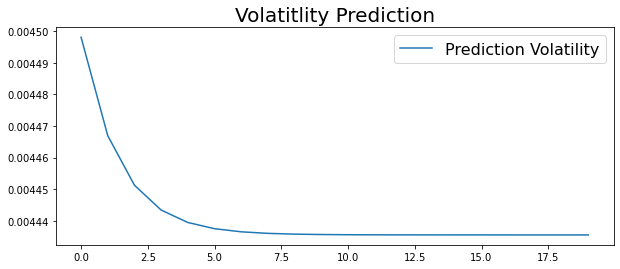

In [33]:
#prediction of violatility using model 

predictions = model_fit.forecast(horizon = 20)
plt.figure(figsize = (10, 4))
#true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatitlity Prediction', fontsize = 20)
plt.legend(['Prediction Volatility'], fontsize = 16)


In [32]:
# 7i GARCH(1,1) MODEL: Fit the data to Garch(1,1)
#for November (Equity)
Fit_Equity_returns_nov = arch_model(r_Vxus[23:43], p=1, q=1)
print(Fit_Equity_returns_nov.fit())

model_fit = Fit_Equity_returns_nov.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5544703.760137666
Iteration:      2,   Func. Count:     16,   Neg. LLF: -79.97982253920325
Optimization terminated successfully    (Exit mode 0)
            Current function value: -79.9798225600898
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                79.9798
Distribution:                  Normal   AIC:                          -151.960
Method:            Maximum Likelihood   BIC:                          -147.977
                                        No. Observations:                   20
Date:                Wed, Dec 01 2021   Df Residuals:                       16
Time:           